## Project Goal: The goal of the project is to forecast the closing prices of HDFC bank for a period of 6 months from July to December 2020.

### Getting the libraries required

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Getting the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HDFCBANK.NS.csv to HDFCBANK.NS (2).csv


In [36]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HDFCBANK.NS.csv']))

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/30/2015,526.125000,536.000000,524.000000,533.575012,506.103973,3645068.0
1,7/1/2015,530.674988,538.500000,530.025024,536.174988,508.570099,2485594.0
2,7/2/2015,532.500000,533.849976,527.825012,529.099976,509.460754,2241722.0
3,7/3/2015,527.025024,538.075012,527.025024,537.125000,517.187866,2019644.0
4,7/6/2015,532.025024,542.500000,530.125000,541.750000,521.641296,1633890.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1229 non-null   object 
 1   Open       1229 non-null   float64
 2   High       1229 non-null   float64
 3   Low        1229 non-null   float64
 4   Close      1229 non-null   float64
 5   Adj Close  1229 non-null   float64
 6   Volume     1229 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [39]:
df['Date'] = pd.to_datetime(df.Date, infer_datetime_format = True)
df.index = df['Date']


#### Plotting the time series

In [40]:
df_1 = pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Close'])

for i in range(0, len(df)):
  df_1['Date'][i] = df['Date'][i]
  df_1['Close'][i] = df['Close'][i]

df_1.head()

,Date,Close
0,2015-06-30 00:00:00,533.575
1,2015-07-01 00:00:00,536.175
2,2015-07-02 00:00:00,529.1
3,2015-07-03 00:00:00,537.125
4,2015-07-06 00:00:00,541.75


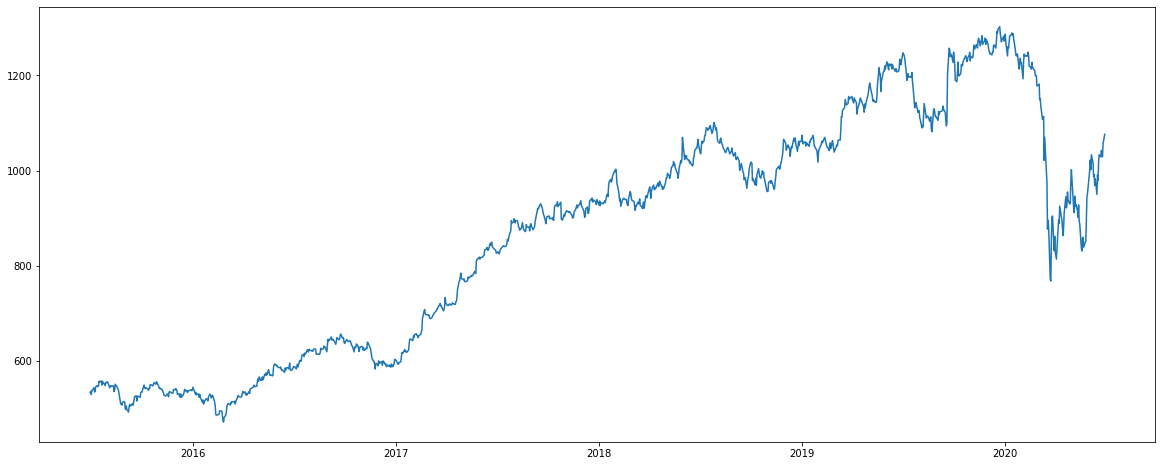

In [41]:
plt.figure(figsize = (20,8))
plt.plot(df_1['Date'], df_1['Close'], label='Close Price history')

#### Splitting the dataset into the training set and the test set

#### Here we are taking the timeframe from 3oth June 2015 to 31st December 2019 as the training set and from 1st January 2020 to 29th June 2020

In [53]:
train = df_1[:1109]
test = df_1[1109:]

In [54]:
print("The training set has share prices of : {} days".format(train.shape[0]))
print("The test set has share prices of : {} days".format(test.shape[0]))

The training set has share prices of : 1109 days
The test set has share prices of : 120 days


#### Applying moving average to the dataset

#### Now we will apply moving averages to the dataset and find out the accuracy of the prediction 

In [55]:
pred = []

for i in range(0, len(test)):
  a = train['Close'][len(train) - 60 + i :].sum() + sum(pred) 
  b = a / 60
  pred.append(b)

#### Calculating the root mean square error of the prediction

In [56]:
preds = []

for i in range(0,test.shape[0]):

    a = train['Close'][len(train) - 600 + i:].sum() + sum(preds)
    b = a / 600
    preds.append(b)


#### The window of 600 days i.e. 1 year and 7.8 months has been obtained after looking at the values of rmse for different window values

#### Checking the accuracy of the prediction using rmse

In [57]:
rmse = np.sqrt(np.mean(np.power((np.array(test['Close']) - preds),2)))
print('\n RMSE value on test set is : {}'.format(rmse))


 RMSE value on test set is : 162.9053634437628


#### Plotting the actual closing price and the predicted prices

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


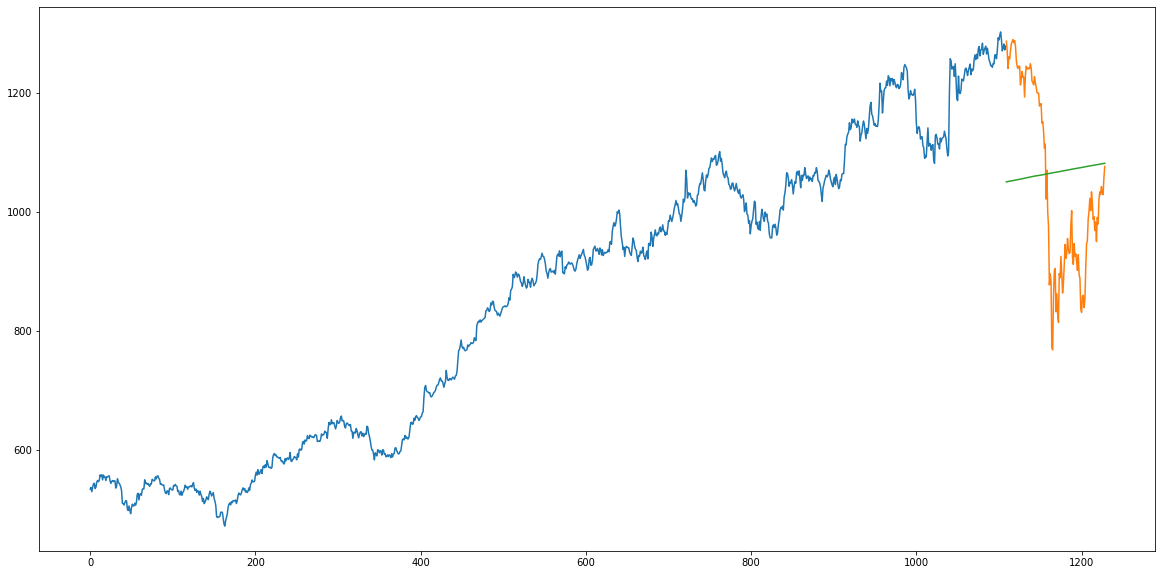

In [58]:
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

#### Here since we are taking the average of the predictions as well as the past past values but not values from the test dataset our model could not predict the fall in the closing prices during the start of the year 2020

#### Using Recurrent Neural Networks to predict the closing share price

#### Scaling the training dataset

In [177]:
train = df.iloc[:1109,4:5].values
test = df.iloc[1109:,4:5].values

In [178]:
train_scaled = sc.fit_transform(train)

In [179]:
train.shape

(1109, 1)

In [180]:
X_train = []
y_train = []

#### X_train will be the input to the neural network whereas y_train will be the output to the neural network. So for each financial day X_train will contain the stock prices of n previous days whereas y_train will contain the stock price for the next financial day. They have been intialized as empty lists. n will be decided by trying different window sizes.

In [181]:
for i in range(60, 1109):
    X_train.append(train_scaled[i - 60 : i,0])
    y_train.append(train_scaled[i,0])

#### Here we can see that if take i = 60, it means that the first 60 closing prices from 0 to 59 will get stored in the training set and the 60th value will go the test set

#### Since the neural network accepts only numpy arrays we are converting X_train and y_train into arrays

In [182]:
X_train, y_train = np.array(X_train),np.array(y_train)

#### Converting the 2D array into 3D array

#### Here we need three dimensions, the batch size, the number of timestamps and the number of indicators which is 1 in our case

In [183]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#### Importing the Keras libraries and packages

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initializing the RNN model

In [185]:
rnn = Sequential()

In [186]:
rnn.add(LSTM(units = 50,return_sequences = True, input_shape = (X_train.shape[1],1)))
rnn.add(Dropout(0.2))

#### Here we have done dropout regularization to prevent overfitting

#### Adding 3 LSTM layers and an output layer

In [187]:
rnn.add(LSTM(units = 50,return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 50,return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.2))

rnn.add(Dense(units = 1))

#### Compiling the RNN model

In [188]:
rnn.compile(optimizer = 'adam',loss = 'mean_squared_error')

##### Training the model

In [189]:
rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1049/1049 [==============================] - 6s 6ms/step - loss: 0.2146
Epoch 2/100
1049/1049 [==============================] - 5s 5ms/step - loss: 0.0358
Epoch 3/100
1049/1049 [==============================] - 5s 5ms/step - loss: 0.0248
Epoch 4/100
1049/1049 [==============================] - 5s 5ms/step - loss: 0.0248
Epoch 5/100
1049/1049 [==============================] - 5s 4ms/step - loss: 0.0254
Epoch 6/100
1049/1049 [==============================] - 5s 4ms/step - loss: 0.0213
Epoch 7/100
1049/1049 [==============================] - 5s 4ms/step - loss: 0.0210
Epoch 8/100
1049/1049 [==============================] - 5s 4ms/step - loss: 0.0180
Epoch 9/100
1049/1049 [==============================] - 5s 5ms/step - loss: 0.0183
Epoch 10/100
1049/1049 [==============================] - 5s 5ms/step - loss: 0.0176
Epoch 11/100
1049/1049 [==============================] - 5s 4ms/step - loss: 0.0204
Epoch 12/100
1049/1049 [==============================] - 5s 5ms/step - lo

#### Now to predict for the month of January 2020 we need dataset before January which is present in the training set. So, we need to combine the two datasets, so that we can use both the training and test set data to predict the closing prices

In [143]:
total = df.iloc[:,4:5].values

In [146]:
inputs = total[len(total)-len(test)-60:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []


#### We have 120 days in the test set. So for the last value we need 60 days of data before that. So here we are using data from the test set to predict for a day in the test set only.

In [148]:
for i in range(60, 180):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

#### Here if take the first value 60, it means we are predicting for the very first value in the test dataset. So, all the 60 prices preceeding that data are added to X_test based on which we will predict for the 61st day which is the first day in the test set

In [150]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = rnn.predict(X_test)

#### Since we have scaled our values we need to bring back the prices in the original format


In [151]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Plotting the results from our RNN model

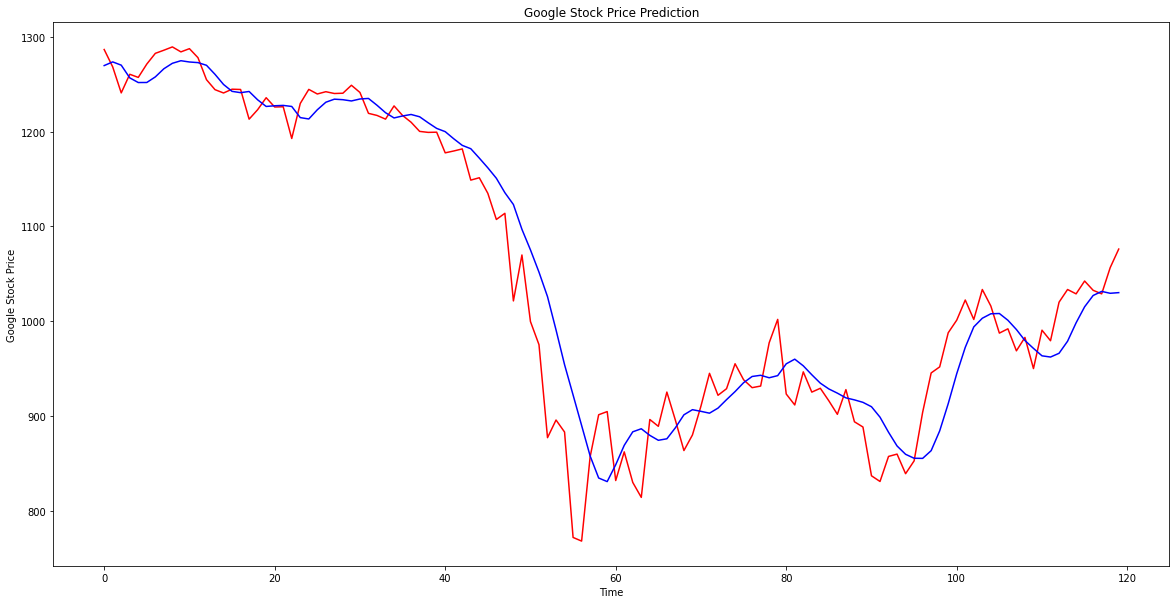

In [153]:
plt.plot(test, color ='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', 
         label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

#### Evaluating the RNN model

In [156]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test, predicted_stock_price))
rmse

40.6427241061133

#### Here we can see how the root mean squared error has reduced from 162 for the moving average to 40 for the recurrent neural network